   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

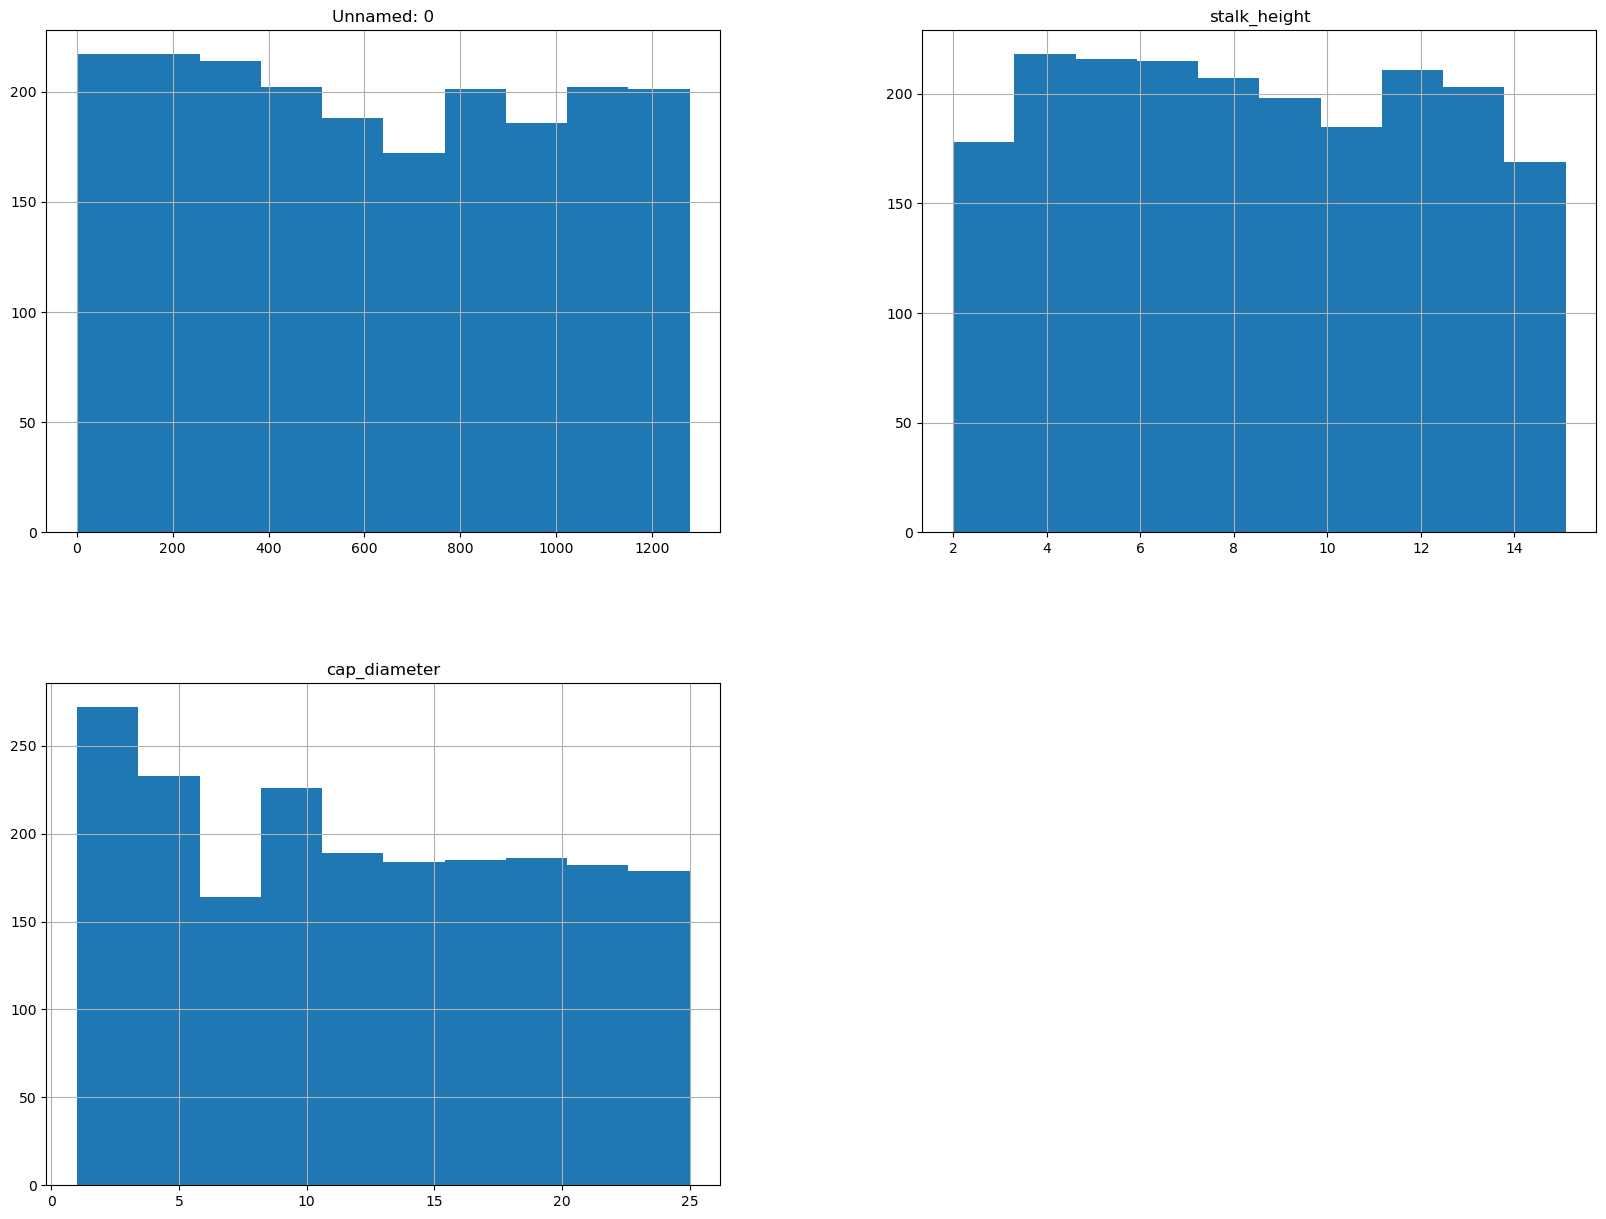

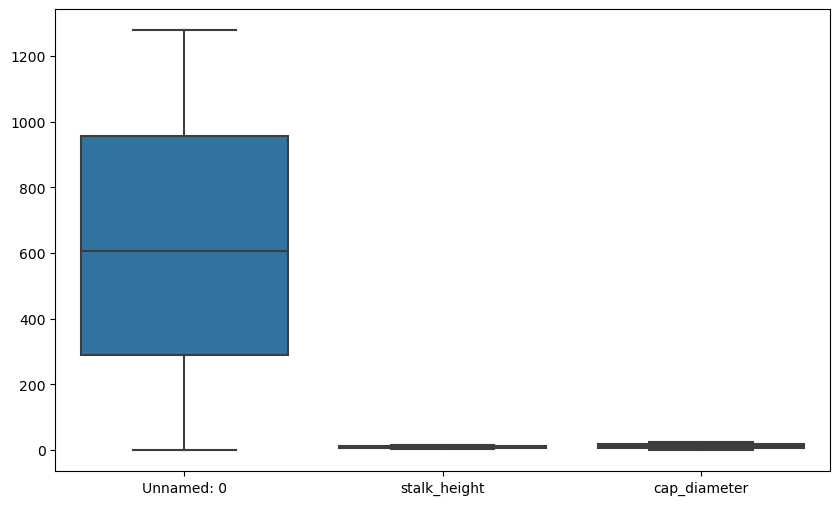

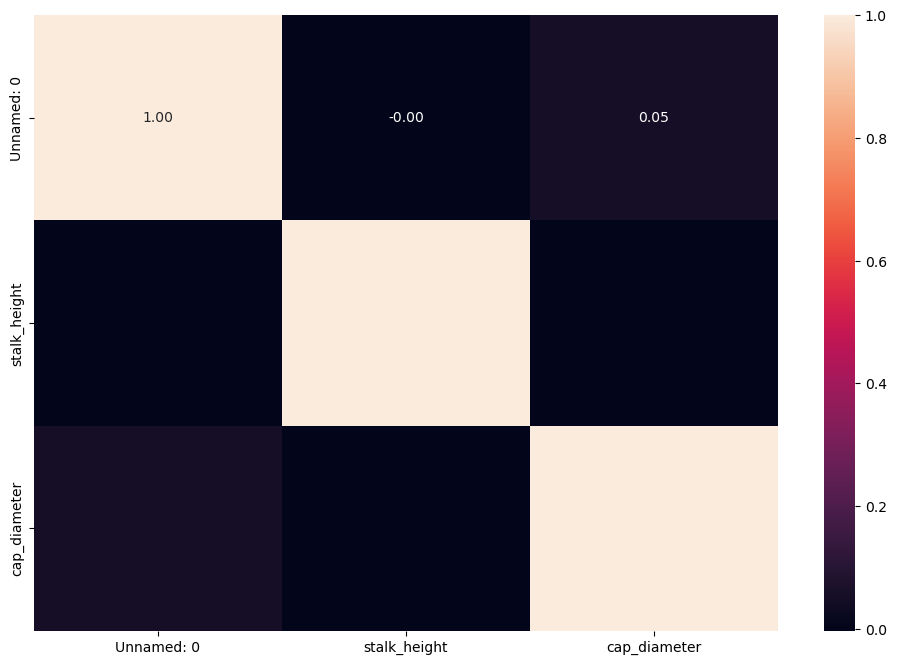

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

In [ ]:
# SUPPORT VECTOR MACHINE

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Task 1: Exploratory Data Analysis (EDA)
# Load the Mushroom dataset
data = pd.read_csv(r"C:\Users\sai\OneDrive\Documents\mushroom.csv")

# Fundamental data exploration
print(data.head())
print(data.info())
print(data.describe())

# Feature distributions
data.hist(figsize=(20, 15))
plt.show()

# Box plots for feature distributions
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()

# Investigate feature correlations
numeric_data = data.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f")
plt.show()

# Task 2: Data Preprocessing
# Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split the dataset into training and testing sets
X = data.drop('class', axis=1)
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Task 3: Data Visualization
# Scatter plots
sns.pairplot(data, hue='class')
plt.show()

# Visualize class distributions
sns.countplot(x='class', data=data)
plt.show()

# Task 4: SVM Implementation
# Implement a basic SVM classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)

# Evaluate model performance
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Task 5: Visualization of SVM Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test.iloc[:, 0], y=X_test.iloc[:, 1], hue=y_pred, palette='viridis')
plt.title('SVM Classification Results')
plt.show()

# Task 6: Parameter Tuning and Optimization
# Experiment with different SVM hyperparameters
svm_model_tuned = SVC(kernel='linear', C=1.0)
svm_model_tuned.fit(X_train, y_train)
y_pred_tuned = svm_model_tuned.predict(X_test)
print(classification_report(y_test, y_pred_tuned))

# Task 7: Comparison and Analysis
# Compare SVM performance with various kernels
kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))

# Analyze SVM strengths and weaknesses
# Discuss practical implications of SVM in real-world classification tasks
